In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/transactions.csv")

In [4]:
# 0 - event
# 2 - team
# 4 - form
# 10 - registration
df.transDonationEntityType.value_counts()

0     1920517
4     1260756
10     140398
2       37596
Name: transDonationEntityType, dtype: int64

In [5]:
df = df[df.transDonationEntityType.isin([0, 2, 10])]

In [6]:
len(df)

2098511

In [7]:
print("Average donation value:")
df.groupby('transDonationEntityType')['amount'].mean()

Average donation value:


transDonationEntityType
0     131.572732
2      81.015110
10     73.752294
Name: amount, dtype: float64

In [8]:
print("Sum donation value by target entity type:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.groupby('transDonationEntityType')['amount'].sum()

Sum donation value by target entity type:


transDonationEntityType
0    252687668.820
2      3045844.090
10    10354674.550
Name: amount, dtype: float64

In [9]:
df.groupby('transDonationEntityType')['amount'].count()

transDonationEntityType
0     1920517
2       37596
10     140398
Name: amount, dtype: int64

In [10]:
unique_forms = 920
unique_teams = len(df[df.transDonationEntityType==2].transDonationEntity.unique())
unique_regs = len(df[df.transDonationEntityType==10].transDonationEntity.unique())

print("Average sum per event: {} for {} events".format(252687668.820/unique_forms, unique_forms))
print("Average sum per team: {} for {} teams".format(3045844.090 / unique_teams, unique_teams))
print("Average sum per reg: {} for {} regs".format(10354674.550 / unique_regs, unique_regs))

Average sum per event: 274660.509587 for 920 events
Average sum per team: 401.614463344 for 7584 teams
Average sum per reg: 235.617324277 for 43947 regs


In [11]:
f = {'amount':['count', 'mean', 'sum'], 'form': ['first']}
reg_donations = df[['amount', 'transDonationEntity', 'transDonationEntityType', 'form']][df.transDonationEntityType==10].groupby('transDonationEntity').agg(f)

reg_donations.columns = ['_'.join(col).strip() for col in reg_donations.columns.values]
reg_donations = reg_donations.reset_index()
reg_donations.head()

,transDonationEntity,amount_count,amount_mean,amount_sum,form_first
0,0,13,49.892,648.600,1492
1,26627,12,54.583,655.000,521285
2,27651,11,61.364,675.000,521285
3,27662,30,98.667,2960.000,521285
4,27664,1,100.000,100.000,521285


In [12]:
reg_donations[['amount_count', 'amount_mean', 'amount_sum']].corr()

,amount_count,amount_mean,amount_sum
amount_count,1.000,-0.004,0.681
amount_mean,-0.004,1.000,0.300
amount_sum,0.681,0.300,1.000


# Focusing on registrants

In [13]:
print("{} forms included in dataset".format(len(reg_donations.form_first.unique())))
avg_registrants = reg_donations.groupby('form_first')['transDonationEntity'].count().mean()
print("{} average registrants per form".format(avg_registrants))

920 forms included in dataset
47.7684782609 average registrants per form


In [14]:
reg_donations['pcnt_raised'] = reg_donations.apply(
    lambda x: x.amount_sum / reg_donations[reg_donations.form_first==x.form_first].amount_sum.sum(), axis=1)
reg_donations.head()

,transDonationEntity,amount_count,amount_mean,amount_sum,form_first,pcnt_raised
0,0,13,49.892,648.600,1492,0.098
1,26627,12,54.583,655.000,521285,0.014
2,27651,11,61.364,675.000,521285,0.015
3,27662,30,98.667,2960.000,521285,0.064
4,27664,1,100.000,100.000,521285,0.002


In [15]:
d = []
for f in reg_donations.form_first.unique():
    temp_df = reg_donations[reg_donations.form_first==f].sort_values('pcnt_raised', ascending=False)
    funds_pcnt = 0.
    reg_count = 0
    for _, r in temp_df.iterrows():
        funds_pcnt += r.pcnt_raised
        reg_count += 1
        if funds_pcnt > .8:
            d.append({'form': f, 'reg_count': reg_count, 'prcnt_regs': float(reg_count) / float(len(temp_df))})
            break


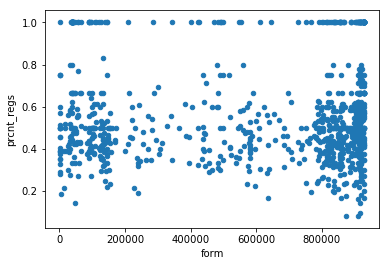

In [16]:
reg_count_to_80prcnt_funds = pd.DataFrame(d)
reg_count_to_80prcnt_funds.plot.scatter(x='form', y='prcnt_regs')

In [17]:
pd.cut(reg_count_to_80prcnt_funds['prcnt_regs'], bins=10).value_counts()

(0.45, 0.542]      228
(0.358, 0.45]      201
(0.908, 1.0]       132
(0.542, 0.633]     123
(0.267, 0.358]     104
(0.633, 0.725]      52
(0.725, 0.817]      35
(0.175, 0.267]      35
(0.0824, 0.175]      9
(0.817, 0.908]       1
Name: prcnt_regs, dtype: int64

In [18]:
pd.cut(reg_count_to_80prcnt_funds['prcnt_regs'], bins=10).value_counts().sort_index()

(0.0824, 0.175]      9
(0.175, 0.267]      35
(0.267, 0.358]     104
(0.358, 0.45]      201
(0.45, 0.542]      228
(0.542, 0.633]     123
(0.633, 0.725]      52
(0.725, 0.817]      35
(0.817, 0.908]       1
(0.908, 1.0]       132
Name: prcnt_regs, dtype: int64

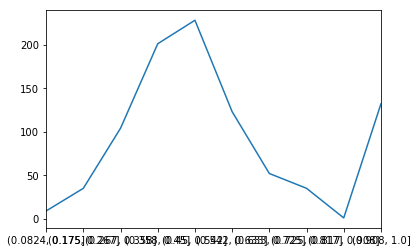

In [19]:
pd.cut(reg_count_to_80prcnt_funds['prcnt_regs'], bins=10).value_counts().sort_index().plot()

## bringing in badge & welcome quest data

In [23]:
reg_engagement = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/logs/reg_participation.csv")

In [24]:
reg_engagement.head()

,message_registration,is_badge,is_welcomequest
0,0,13025,0
1,1,0,4
2,2,0,2
3,3,0,2
4,2049,0,6


In [37]:
reg_engagement.message_registration = reg_engagement.message_registration.fillna(0).astype(int)
reg_engagement.is_badge = reg_engagement.is_badge.fillna(0).astype(int)
reg_engagement.is_welcomequest = reg_engagement.is_welcomequest.fillna(0).astype(int)

In [38]:
len(reg_engagement)

161748

In [39]:
len(reg_donations)

43947

In [41]:
mrgd = reg_donations.merge(reg_engagement, left_on="transDonationEntity", right_on="message_registration", how="left")

In [42]:
len(mrgd)

72334

In [46]:
mrgd = mrgd.groupby("message_registration", as_index=False).agg({
    'amount_count': 'first',
    'amount_sum': 'first',
    'amount_mean': 'first',
    'pcnt_raised': 'first',
    'is_badge': 'sum',
    'is_welcomequest': 'sum'
})

In [49]:
mrgd.corr()

,message_registration,amount_mean,amount_count,is_badge,amount_sum,pcnt_raised,is_welcomequest
message_registration,1.000,0.006,-0.071,-0.029,-0.048,0.012,-0.097
amount_mean,0.006,1.000,-0.007,0.001,0.319,0.193,-0.013
amount_count,-0.071,-0.007,1.000,0.019,0.752,0.278,0.353
is_badge,-0.029,0.001,0.019,1.000,0.011,0.012,0.000
amount_sum,-0.048,0.319,0.752,0.011,1.000,0.340,0.231
pcnt_raised,0.012,0.193,0.278,0.012,0.340,1.000,0.157
is_welcomequest,-0.097,-0.013,0.353,0.000,0.231,0.157,1.000


In [54]:
mrgd.groupby('is_welcomequest')[['amount_mean', 'amount_count', 'pcnt_raised', 'amount_sum']].mean()

,amount_mean,amount_count,pcnt_raised,amount_sum
is_welcomequest,,,,
0.000,92.431,1.539,0.018,148.775
1.000,76.350,1.764,0.012,126.577
2.000,78.114,3.127,0.021,226.512
3.000,80.101,5.753,0.037,475.501
4.000,75.213,6.676,0.039,522.409
5.000,70.383,7.727,0.053,580.113
6.000,65.104,7.826,0.041,525.519
7.000,29.000,3.000,0.050,105.000


In [53]:
mrgd.is_welcomequest.value_counts()

1.000    15551
2.000     5960
3.000     3436
4.000     1900
5.000     1154
0.000      885
6.000      384
7.000        2
Name: is_welcomequest, dtype: int64

In [58]:
badges_bins = [0, 1, 3, 5, 7, 10]
mrgd['badges_bin'] = pd.cut(mrgd['is_badge'], bins=badges_bins)
mrgd['badges_bin'].value_counts()

(1, 3]     7798
(0, 1]     7795
(3, 5]     2442
(5, 7]     1050
(7, 10]     460
Name: badges_bin, dtype: int64

In [59]:
mrgd.groupby('badges_bin')[['amount_mean', 'amount_count', 'pcnt_raised', 'amount_sum']].mean()

,amount_mean,amount_count,pcnt_raised,amount_sum
badges_bin,,,,
"(0, 1]",85.811,3.226,0.015,253.861
"(1, 3]",87.374,3.041,0.024,239.148
"(3, 5]",95.591,5.312,0.042,406.804
"(5, 7]",97.135,6.110,0.051,500.658
"(7, 10]",95.646,10.289,0.086,914.207


In [84]:
mrgd[mrgd['is_badge']>9][['amount_mean', 'amount_count', 'amount_sum', 'pcnt_raised']].mean()

amount_mean     85.226
amount_count     9.566
amount_sum     901.207
pcnt_raised      0.073
dtype: float64

In [79]:
print(len(mrgd))
print("0:1: {}%".format(float(7795)/float(29272)))
print("1:3: {}%".format(float(7798)/float(29272)))
print("3:5: {}%".format(float(2442)/float(29272)))
print("5:7: {}%".format(float(1050)/float(29272)))
print("7:10: {}%".format(float(460)/float(29272)))
mrgd['badges_bin'].value_counts()

29272
0:1: 0.266295435911%
1:3: 0.26639792293%
3:5: 0.0834244329052%
5:7: 0.0358704564089%
7:10: 0.015714676141%


(1, 3]     7798
(0, 1]     7795
(3, 5]     2442
(5, 7]     1050
(7, 10]     460
Name: badges_bin, dtype: int64

bringing in the timeline data to check correlation between quick completion of the welcome quest steps and funds raised.

In [61]:
ts_df = pd.read_csv("~/Repositories/datasets/logs/reg_part_timeline.csv")

In [71]:
welcomequest_under_24 = ts_df[ts_df['total_time']<24].registration
mrgd['welcomequest_under_24'] = mrgd.message_registration.isin(welcomequest_under_24)
welcomequest_under_48 = ts_df[ts_df['total_time']<48].registration
mrgd['welcomequest_under_48'] = mrgd.message_registration.isin(welcomequest_under_48)
welcomequest_under_72 = ts_df[ts_df['total_time']<72].registration
mrgd['welcomequest_under_72'] = mrgd.message_registration.isin(welcomequest_under_72)
welcomequest_under_week = ts_df[ts_df['total_time']<168].registration
mrgd['welcomequest_under_week'] = mrgd.message_registration.isin(welcomequest_under_week)

In [69]:
mrgd.head()

,message_registration,amount_mean,amount_count,is_badge,amount_sum,pcnt_raised,is_welcomequest,badges_bin,welcomequest_under_24
0,0.000,49.892,13,13025.000,648.600,0.098,0.000,NaN,False
1,26627.000,54.583,12,11.000,655.000,0.014,4.000,NaN,False
2,27651.000,61.364,11,9.000,675.000,0.015,4.000,"(7, 10]",False
3,27662.000,98.667,30,14.000,2960.000,0.064,6.000,NaN,False
4,27664.000,100.000,1,3.000,100.000,0.002,2.000,"(1, 3]",False


In [70]:
mrgd.groupby('welcomequest_under_24')[['amount_mean', 'amount_count', 'pcnt_raised', 'amount_sum']].mean()

,amount_mean,amount_count,pcnt_raised,amount_sum
welcomequest_under_24,,,,
False,80.914,4.970,0.032,403.294
True,75.722,2.423,0.016,172.796


In [72]:
mrgd.groupby('welcomequest_under_48')[['amount_mean', 'amount_count', 'pcnt_raised', 'amount_sum']].mean()

,amount_mean,amount_count,pcnt_raised,amount_sum
welcomequest_under_48,,,,
False,81.794,4.899,0.031,401.946
True,75.575,2.525,0.017,180.304


In [73]:
mrgd.groupby('welcomequest_under_72')[['amount_mean', 'amount_count', 'pcnt_raised', 'amount_sum']].mean()

,amount_mean,amount_count,pcnt_raised,amount_sum
welcomequest_under_72,,,,
False,82.255,4.798,0.031,397.893
True,75.557,2.607,0.018,186.189


In [74]:
mrgd.groupby('welcomequest_under_week')[['amount_mean', 'amount_count', 'pcnt_raised', 'amount_sum']].mean()

,amount_mean,amount_count,pcnt_raised,amount_sum
welcomequest_under_week,,,,
False,82.956,4.662,0.030,390.452
True,75.744,2.758,0.019,199.430
